<a href="https://colab.research.google.com/github/VISHNUCHARAN27/DEEP-LEARNING/blob/master/colorcatdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DOWNLOAD DATASETS OF CATS AND DOGS**

In [0]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

# **UNZIP THE DATASETS**

In [0]:
!unzip -q kagglecatsanddogs_3367a.zip

# **USE LS**

In [0]:
%ls

 cell_images/                            kagglecatsanddogs_3367a.zip
 cell-images-for-detecting-malaria.zip   kaggle.json
'Chest CNN.model'                        __MACOSX/
 chest_xray/                            'MSR-LA - 3467.docx'
 chest-xray-pneumonia.zip                PetImages/
 chest_xray.zip                         'readme[1].txt'
'kaggle (1).json'                        sample_data/


# **IMPORT THE COLOR IMAGES**

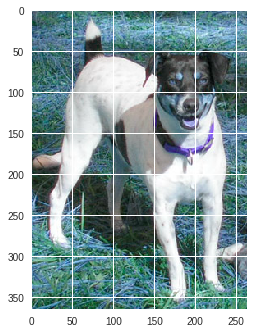

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

datadir='/content/PetImages'
categories=['Dog','Cat']

for category in categories:
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img))
    plt.imshow(img_array)
    plt.show()
    break
  break
  

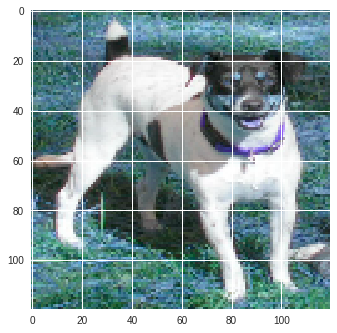

In [0]:
img_size=120
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array)

# **CREATE TRAINING DATASETS**

In [0]:
def dump_pickle(X,y,pickle_counter,category,valid_img_count,count):
  
  print("\n")
  
  X=np.array(X).reshape(-1,img_size,img_size,3)
  pickle_out=open(os.path.join(datadir,"X_{}_{}".format(category,pickle_counter)),"wb")
  pickle.dump(X,pickle_out)
  pickle_out.close
  INFO="[PROCESS]: X_{}_{}.pickle_Generated\n".format(category,pickle_counter)
  print(INFO)
  X=[]
  
  pickle_out=open(os.path.join(datadir,"y_{}_{}".format(category,pickle_counter)),"wb")
  pickle.dump(y,pickle_out)
  pickle_out.close
  INFO="[PROCESS] y_{}_{}.pickle_Generated\n".format(category,pickle_counter)
  y=[]
  
  print(INFO)
  

In [0]:
from tqdm import tqdm
import pickle

def create_training_data():
  X=[]
  y=[]
  count=0
  valid_img_count=0
  for category in categories:
    path=os.path.join(datadir,category)
    class_num=categories.index(category)
    pickle_counter=0
    
    for img in tqdm(os.listdir(path),desc=category):
      try:
        img_array=cv2.imread(os.path.join(path,img))
        new_array=cv2.resize(img_array,(img_size,img_size))
        new_array=new_array/255.0
        
        X.append(new_array)
        y.append(class_num)
        
        count+=1
        valid_img_count+=1
          
        if count >= 2500:
          dump_pickle(X,y,pickle_counter,category,valid_img_count,count)
          count=0
          pickle_counter+=1
          X=[]
          y=[]
          
        
      except Exception as e:
        pass
    
    if pickle_counter==4 and category=='Dog' and count<2500:
          dump_pickle(X,y,pickle_counter,category,valid_img_count,count)
          count=0
          X=[]
          y=[]
    
    if pickle_counter==4 and category=='Cat' and count<2500:
      dump_pickle(X,y,pickle_counter,category,valid_img_count,count)
      count=0
      X=[]
      y=[]
      
    
      
    
  
  return pickle_counter
  
b=create_training_data()
  

In [0]:
%ls PetImages

Cat/     X_Cat_1  X_Cat_4  X_Dog_2  y_Cat_0  y_Cat_3  y_Dog_1  y_Dog_4
Dog/     X_Cat_2  X_Dog_0  X_Dog_3  y_Cat_1  y_Cat_4  y_Dog_2
X_Cat_0  X_Cat_3  X_Dog_1  X_Dog_4  y_Cat_2  y_Dog_0  y_Dog_3


In [0]:
print(b)

4


In [0]:
import random
import pickle
import numpy as np


for i in range(b+1):
    
    print("------------------------------\n")
    print("Processing part-{}".format(i))
    
    pickle_in=open(os.path.join(datadir,"X_{}_{}".format(categories[0],i)),"rb")
    Xdog=pickle.load(pickle_in)
    pickle_in.close
    
    pickle_in=open(os.path.join(datadir,"X_{}_{}".format(categories[1],i)),"rb")
    Xcat=pickle.load(pickle_in)
    pickle_in.close
    
    pickle_in=open(os.path.join(datadir,"y_{}_{}".format(categories[0],i)),"rb")
    ydog=pickle.load(pickle_in)
    pickle_in.close
    
    pickle_in=open(os.path.join(datadir,"y_{}_{}".format(categories[1],i)),"rb")
    ycat=pickle.load(pickle_in)
    pickle_in.close
    
    print("\nSplitted sucessfully-{}".format(i))
    
    X=np.concatenate((Xdog,Xcat),axis=0)
    y=np.concatenate((ydog,ycat),axis=0)
    
    print("\nConcatenated sucessfully-{}".format(i))
    
    BSHUFFLE=[]
    
    x=0
    for label in y:
      BSHUFFLE.append( [X[x],label] )
      x+=1
      
    
      
    random.shuffle(BSHUFFLE)
    print("\nShuffled sucessfully-.{}".format(i))
    
    
    X=[]
    y=[]
    for item in BSHUFFLE:
      X.append(item[0])
      y.append(item[1])
      
      
    X=np.array(X).reshape(-1,img_size,img_size,3)
    
    pickle_out=open(os.path.join(datadir,"X_{}".format(i)),"wb")
    pickle.dump(X,pickle_out)
    pickle_out.close
    
    pickle_out=open(os.path.join(datadir,"y_{}".format(i)),"wb")
    pickle.dump(y,pickle_out)
    pickle_out.close
    
    print("\nSaved Sucessfully")
    
    
    
    
    
    


------------------------------

Processing part-0

Splitted sucessfully-0

Concatenated sucessfully-0

Shuffled sucessfully-.0

Saved Sucessfully
------------------------------

Processing part-1

Splitted sucessfully-1

Concatenated sucessfully-1

Shuffled sucessfully-.1

Saved Sucessfully
------------------------------

Processing part-2

Splitted sucessfully-2

Concatenated sucessfully-2

Shuffled sucessfully-.2

Saved Sucessfully
------------------------------

Processing part-3

Splitted sucessfully-3

Concatenated sucessfully-3

Shuffled sucessfully-.3

Saved Sucessfully
------------------------------

Processing part-4

Splitted sucessfully-4

Concatenated sucessfully-4

Shuffled sucessfully-.4

Saved Sucessfully


In [0]:
%ls PetImages

Cat/  X_2      X_Cat_1  X_Dog_0  X_Dog_4  y_3      y_Cat_2  y_Dog_1
Dog/  X_3      X_Cat_2  X_Dog_1  y_0      y_4      y_Cat_3  y_Dog_2
X_0   X_4      X_Cat_3  X_Dog_2  y_1      y_Cat_0  y_Cat_4  y_Dog_3
X_1   X_Cat_0  X_Cat_4  X_Dog_3  y_2      y_Cat_1  y_Dog_0  y_Dog_4


In [0]:
print(b)

4


# **TRAINING COLOURED DATASET**

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
from google.colab import files
import pickle


model= Sequential()
  
model.add( Conv2D(64,(3,3),input_shape=(120,120,3)))
model.add( Activation("relu") )
model.add( MaxPooling2D(pool_size=(2,2)) )
      
model.add( Conv2D(64,(3,3)))
model.add( Activation("relu") )
model.add( MaxPooling2D(pool_size=(2,2)) )

model.add( Conv2D(64,(3,3)))
model.add( Activation("relu") )
model.add( MaxPooling2D(pool_size=(2,2)) )
        
        
model.add(Flatten())
      

        
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

epochs=10

for epoch in range(epochs):
  print("EPOCHS-{}\n".format(epoch))
  for i in range(b+1):
    X=pickle.load(open(os.path.join(datadir,"X_{}".format(i)),"rb"))
    y=pickle.load(open(os.path.join(datadir,"y_{}".format(i)),"rb"))
    

    model.fit(X,np.array(y),batch_size=32,epochs=1,validation_split=0.1)
      

      
      

Instructions for updating:
Colocations handled automatically by placer.
EPOCHS-0

Train on 4500 samples, validate on 500 samples
Instructions for updating:
Use tf.cast instead.
4500/4500 [==============================] - 215s 48ms/sample - loss: 0.6756 - acc: 0.5616 - val_loss: 0.6567 - val_acc: 0.5580
Train on 4500 samples, validate on 500 samples
4500/4500 [==============================] - 214s 48ms/sample - loss: 0.6254 - acc: 0.6473 - val_loss: 0.6122 - val_acc: 0.6480
Train on 4500 samples, validate on 500 samples
4500/4500 [==============================] - 213s 47ms/sample - loss: 0.5875 - acc: 0.6820 - val_loss: 0.5419 - val_acc: 0.7280
Train on 4500 samples, validate on 500 samples
4500/4500 [==============================] - 214s 48ms/sample - loss: 0.5443 - acc: 0.7293 - val_loss: 0.5448 - val_acc: 0.7060
Train on 4451 samples, validate on 495 samples
4451/4451 [==============================] - 209s 47ms/sample - loss: 0.5324 - acc: 0.7335 - val_loss: 0.5601 - val_acc: 0.

In [0]:
import tensorflow as tf
import keras

a=datadir+'Cat_Dog_Classifier'
keras.models.save_model(model,filepath=a)

In [0]:
% pwd

'/content'

In [0]:
from google.colab import files

files.download('Cat_Dog_Classifier')

In [0]:
import cv2
import tensorflow as tf

categories=['Dog','Cat']

def prepare(filepath):
  img_size=120
  a=cv2.imread(filepath)
  a1=cv2.resize(a,(img_size,img_size))
  return a1.reshape(-1,img_size,img_size,3)

prediction=model.predict( [  prepare('/cat.jpg')  ]   )
print(categories  [  int (prediction[0][0])   ]  )


Cat
